<a href="https://colab.research.google.com/github/Harshm43/A03/blob/main/Harsh_Mistry_2025_02_10_MNIST_Participation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Fashion Participation Assignment

Due: 2025-02-10 (11:59pm)

* Chapter 2: Mathematical Building Blocks of Neural Networks

* Adapt the examples from Chapter 2 of Francois Chollet to fit the Fashion MNIST Dataset.

* Please include [Listings 2.1 - 2.8]

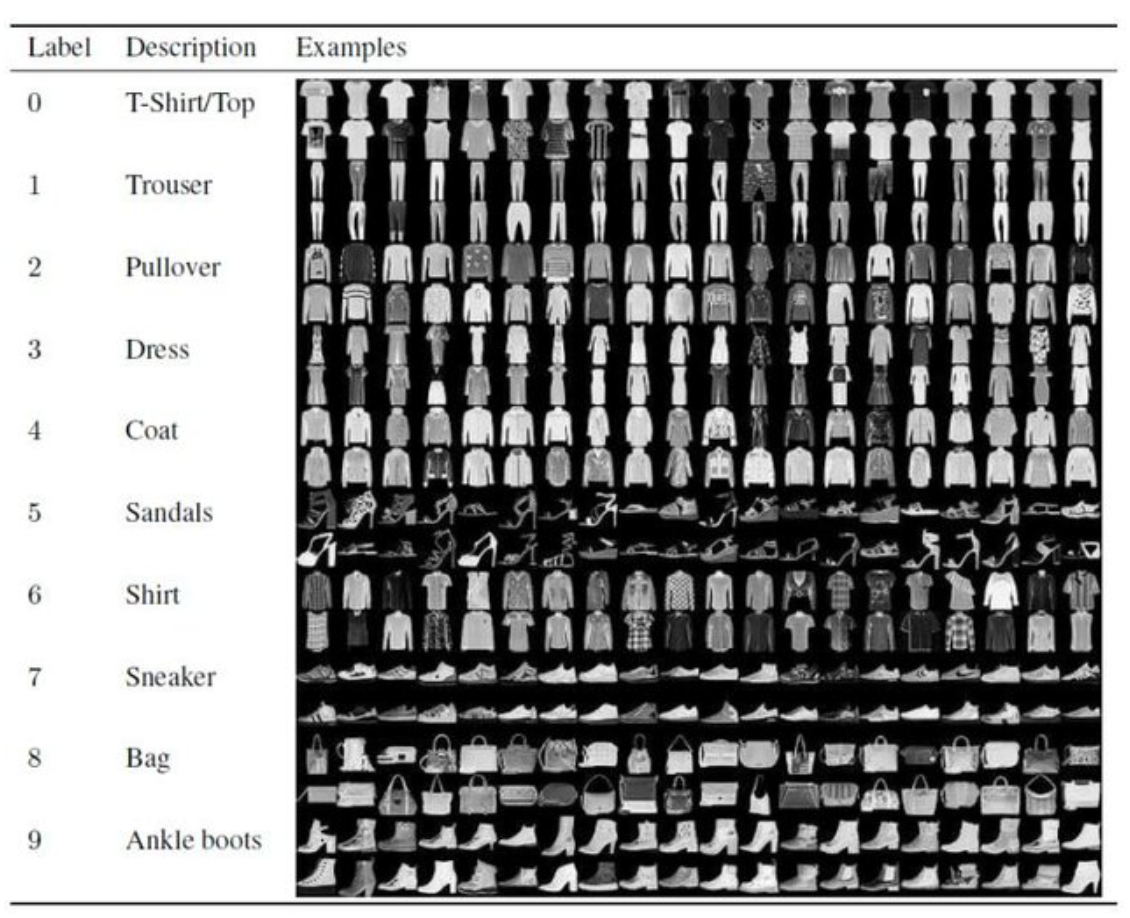

## Listing 2.1

In [ ]:
# Import necessary modules
from tensorflow import keras

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Print the shape of the dataset
print(f"Training set shape: {train_images.shape}, Labels: {train_labels.shape}")
print(f"Test set shape: {test_labels.shape}, Labels: {test_labels.shape}")

## Listing 2.2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a CNN for Fashion MNIST
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),  # Convolution layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(64, (3, 3), activation="relu"),  # Another Conv layer
    layers.MaxPooling2D((2, 2)),  # Pooling
    layers.Flatten(),  # Flatten before dense layers
    layers.Dense(512, activation="relu"),  # Fully connected layer
    layers.Dense(10, activation="softmax")  # Output layer (10 classes)
])


## Listing 2.3

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  # Explicitly set learning rate
    loss="sparse_categorical_crossentropy",  # Correct loss function for integer labels
    metrics=["accuracy"]
)


## Listing 2.4

In [ ]:
# Reshape images for CNN input (Retaining 2D structure)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convert to float and normalize
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## Listing 2.5

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)

## Listing 2.6

In [ ]:
# Select the first 10 test images
test_digits = test_images[:10]

# Make predictions
predictions = model.predict(test_digits)

# Display prediction for the first test image
predicted_label = np.argmax(predictions[0])  # Get the class with highest probability
print(f"Predicted Label: {predicted_label}")

## Listing 2.7

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the accuracy with better formatting
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


## Listing 2.8

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a random index
random_index = np.random.randint(0, len(test_images))  # Pick a random image from test set

# Select the image and reshape if using CNN
digit = np.squeeze(test_images[random_index])  # Remove extra channel dimension if needed

# Make a prediction
predictions = model.predict(test_images)
predicted_label = np.argmax(predictions[random_index])  # Get class with highest probability
actual_label = test_labels[random_index]  # Get the actual class

# Display the image with predictions
plt.imshow(digit, cmap="gray")
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis("off")  # Hide axes
plt.show()
